# Algorithms for Data Science

## Filtering Stream Items

### 1. Preliminaries 

The objective of this lab is to implement algorithms for filtering "good" items on streams. We will start by the simple implementation using only one hash function, and then it will be required of you to implement the full Bloom filter. We assume a random stream $S$ of $m$ email strings. We assume that the first $g$ emails are the good ones, that we have $n$ bits allocated in the bit array $B$ (for simplicity, implemented as an array here).

In [1]:
import random
from string import ascii_lowercase

#parameters
m = 100
g = 10
stream_size = 10000
n = 512

#generate some random strings of size 5 + 1 + 5
D = []
for _ in range(m):
  D.append(''.join(random.choice(ascii_lowercase) for i in range(5))+\
           '@'+''.join(random.choice(ascii_lowercase) for i in range(5)))

print(D)

['hpyan@lozpo', 'txfky@unlbx', 'kqfit@iouyf', 'gxfxz@pfubn', 'rehod@rgjzn', 'rmrtt@qzqwr', 'oljcq@thgpd', 'kydcl@zelpc', 'iypzb@dthpc', 'idijv@drmbt', 'rzrgb@frjnl', 'dxhsj@jypkh', 'kyvwc@chrwd', 'zbcbr@ittth', 'bqzhu@pdreo', 'frcsb@ajnqr', 'pqlbp@rqtbo', 'lnsob@bjcok', 'lwwra@oksdb', 'avbzp@hghhi', 'swlkr@ypxzi', 'bwege@xechp', 'tljtz@jskwv', 'wcams@jwmbv', 'wyhrg@rqcub', 'xnjgq@gecvf', 'ivyzk@ihapl', 'jukxq@bhqoh', 'jhmsv@eaggb', 'rjbzj@stywe', 'vbjgb@qybpx', 'ugmbc@ybyhk', 'qnsvv@cdwlw', 'lmhyc@hacfj', 'gbcwo@cobsy', 'sfedu@echfc', 'qsfmr@fwric', 'wbkbp@etmnq', 'pkceu@cmqso', 'bjezr@qtzsj', 'xlsps@zntyj', 'fngsp@egtdl', 'fokgp@eajxr', 'upafm@imnwc', 'eopzd@lgloc', 'bcsgz@eftfn', 'mlmjv@gdnfz', 'haxkn@ezpop', 'mwqrt@vrmru', 'naofo@ugvgz', 'iguqw@dpagv', 'cvhhu@uqybr', 'domky@nxpsx', 'nuqbv@ppdbo', 'gjvvg@rhskg', 'tyqmw@dvngl', 'efiwq@kqfla', 'rwdsr@ipfew', 'edshi@wbtzo', 'dxzys@ahdxm', 'bftuz@mrkpv', 'wwogq@eldhf', 'hlepx@jxkio', 'iadrp@zfrfj', 'tvrav@gmnlz', 'lkyzv@lfvss', 'oeuqj@ro

### 2. Creating a Hash Function, Filtering Items Using a Single Hash

In the following we create a hash function $h(x)$, which also takes as a parameter a value and $n$, and returns a value in $0\dots n-1$. We populate the byte array $B$, and then we simulate a stream taking random values from $D$ and checking whether the value is good or not. We measure the true positive, false positive, and false negative rates. 

In [3]:
n = 128

#hash function
def h(x,n):
  return hash(x)%n

good_set = set(D[:g]) #just for checking TP and FP rates

#allocate the array of 0s
B = [0] * n

#fill the byte array
for i in range(g): B[h(D[i],n)] = 1
    
print(B)

tp = 0 # good items passing
fp = 0 # bad items passing
tn = 0 # bad items discarded
fn = 0 # good items discarded

#simulate a stream
for _ in range(stream_size):
  #take a random email
  s = random.choice(D)
  #check its hash value
  if B[h(s,n)]==1: #good
    if s not in good_set:
      fp += 1
    else:
      tp += 1
  else: #bad 
    if s in good_set:
      fn += 1
    else:
      tn += 1

print('False positive rate: %f'%(float(fp)/float(tn+fp)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
False positive rate: 0.087997


We may want to create a random hash function that can also be pairwise independent when we will need to generate $k$ independent pairwise hashes.
The following procedure can be implemented:
* choose a large prime number $p$
* generate two random numbers $a$ and $b$ in the range $\{1,\dots,p\}$
* the hash is then $h_{a,b}(x)=ax+b \mod p$
* we can also restrict it into $\{0,\dots,n-1\}$

In [4]:
p = 1223543677

a = random.randrange(p)
b = random.randrange(p)

def h(x,a,b,p,n):
  return ((a*hash(x)+b)%p)%n
#remark: here we use hash(x) instead of the values to allow for all hashable python types
#   e.g., strings, tuples

#reinitialize the array, for testing
B = [0] * n

for i in range(g): 
  B[h(D[i],a,b,p,n)] = 1

print(B)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


### 3. **TASK** - Bloom Filters

Your task is to implement the Bloom filters as described in the class lecture. For this, you have to:
1. generate $k$ random pairwise independent hash functions (_hint_: use the example shown above)
2. initialize $B$, by setting $1$ in each $h_i(x)$, $i\in\{1,\dots,k\}$, for all items $x$ in the good set
3. an item $s$ in the stream is considered good if, for all $i\in\{1,\dots,k\}$, we have $B[h_i(s)]=1$

Measure the true positive and false positive rate for various values of $k$ and compare to the values obtained when setting $k=n/m\ln 2$ (to the nearest integer value). What do you notice?

Rates:

$
  \text{false positive rate} \frac{FP}{FP+TN}
$

$
  \text{true positive rate} \frac{TP}{TP+FN}
$

（tp should always be "1")
vary k, k is the number of hash functions

In [11]:
import math

n = 128
p = 1223543677
fp_list = []
random.seed(42)
good_set = set(D[:g])
#take a random email
s = random.choices(D, k=stream_size)


def h(x: str, a: int, b: int, p: int, n:int) -> int:
  '''
  description: set hash functions
  param {str} x 
  param {int} a
  param {int} b
  param {int} p
  param {int} n
  return {int} the hash value
  '''
  return ((a*hash(x)+b)%p)%n


def gen_hash_functions_params(k: int) -> list:

  '''
  description: generative the random parameters for hash functions
  param {int} k
  return {list} a list of parameters
  '''
  hash_functions_params = []
  for i in range(k):
    a = random.randrange(p)
    b = random.randrange(p)
    hash_functions_params.append([a, b])
  return hash_functions_params


def get_false_positive(s: list, B: list, stream_size: int, hash_functions_params: list, good_set: list):
  '''
  description: calculate the false positive values.
  param {list} s
  param {list} B
  param {int} stream_size
  param {list} hash_functions_params
  param {list} good_set
  return fp, tn: false positive and ture negative values
  '''
  tp = 0 # good items passing
  fp = 0 # bad items passing
  tn = 0 # bad items discarded
  fn = 0 # good items discarded

  #simulate a stream
  for i in range(stream_size):
    #check its hash value
    count = 0
    for j, val in enumerate(hash_functions_params):
      a = val[0]
      b = val[1]
      if B[h(s[i],a,b,p,n)]==1: 
        count += 1
        
    if count == len(hash_functions_params):#good
      if s[i] not in good_set:
        fp += 1
      else:
        tp += 1
    else: #bad 
      if s[i] in good_set:
        fn += 1
      else:
        tn += 1
  return fp, tn


fp_probability_list = []
for k in range(1,100):
  # generate k random pairwise independent hash functions
  hash_functions_params = gen_hash_functions_params(k)

  #reinitialize the array, for testing
  B = [0] * n

  for val in hash_functions_params:
    for i in range(g): 
      a = val[0]
      b = val[1]
      B[h(D[i],a,b,p,n)] = 1

  # calculate false positive
  fp, tn = get_false_positive(s, B, stream_size, hash_functions_params, good_set)
  fp_probability = pow(1-pow(math.e,-k*g/n),k)

  fp_list.append(float(fp)/float(tn+fp))
  fp_probability_list.append(fp_probability)


Plot the false positive curves.

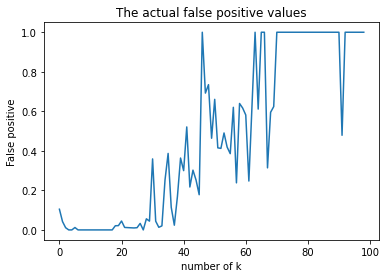

In [12]:
import matplotlib.pyplot as plt
plt.ylabel('False positive')
plt.xlabel('number of k')
plt.title("The actual false positive values")
plt.plot(fp_list)

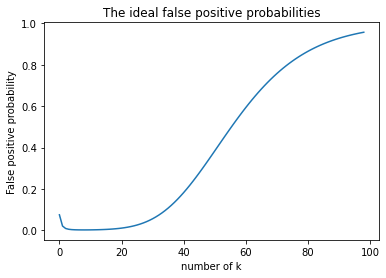

In [13]:
plt.ylabel('False positive probability')
plt.xlabel('number of k')
plt.title("The ideal false positive probabilities")
plt.plot(fp_probability_list)

According to the curves above, the false positive values decreases when the number of k is at the beginning of x coordinate. Then it starts to increase with the increase of k. But the increasing trend is flattening when k approaches certain amount, as it is already near to 1. Also, the actual false positive curve varies a lot compared to the ideal one as there are randomness in reality.

In addition, we can see that when we setting $k=n/m\ln 2$ (to the nearest integer value), we can get the minimum value of fase positive values. At this point, k is the optimal number of hash functions.